In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../BTDB2_SIMULATOR')
from main import *
from rounds import *
from actions import *

# Simulation Examples

We now run the code in a variety of different game scenarios. The goal of this section is to communicate to practioners how a front-end for this simulation may be coded. Given the level of sophistication of the problem at hand, the code is relatively easy to use. To begin, we introduce some helper functions to simplify the code-writing process.

,Game State,Farm Income
0,0,640
1,1,280


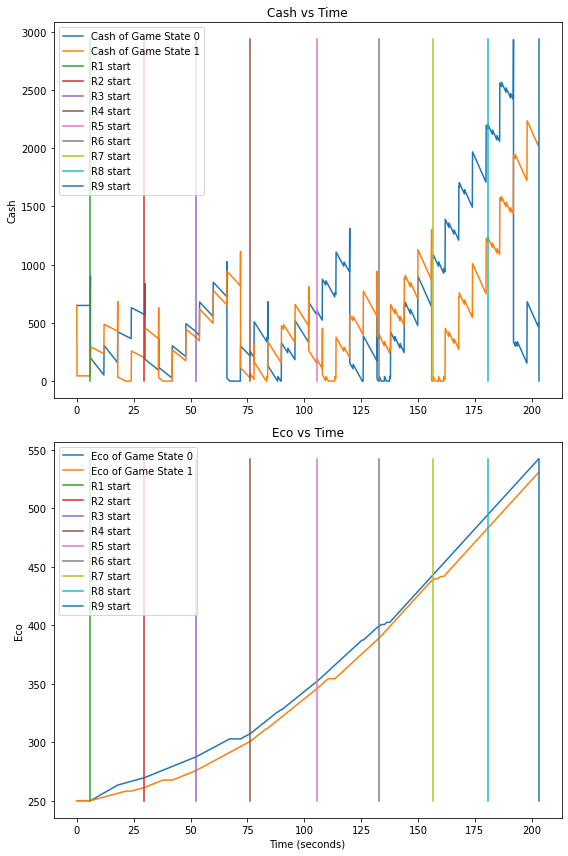

In [2]:
rounds = Rounds(0.25)

buy_queue_wiz = [
    [buyDefense(700, min_buy_time = rounds.getTimeFromRound(1))], #Buy Fireball 
    [buyDefense(650)], #Buy Jericho
    [buyDefense(250)], #Remove barrier 
    [buyFarm()], #Buy the farm 
    [upgradeFarm(0, 0)], #Upgrade the farm to 100
    [buyDefense(1155)], #Buy a 220 tack 
    [upgradeFarm(0, 0)], #Upgrade to 200 farm
    [upgradeFarm(0, 0)] #Upgrade to 300 farm
]

eco_queue = [
    (rounds.getTimeFromRound(1), 'Spaced Blues'),
    (rounds.getTimeFromRound(2), 'Spaced Greens'),
    (rounds.getTimeFromRound(3), 'Spaced Yellows'),
    (rounds.getTimeFromRound(4), 'Spaced Pinks'),
    (rounds.getTimeFromRound(5), 'Spaced Whites'),
    (rounds.getTimeFromRound(6), 'Spaced Blacks'),
    (rounds.getTimeFromRound(9), 'Zero')
]

######################
# EZILI TFW FLOWCHART
######################

buy_queue_tack = [
    [buyDefense(605)], #Buy 020 Tack
    [buyDefense(650)], #Buy Jericho
    [buyDefense(600)], #Buy 030 Tack
    [buyFarm()], #Buy the farm 
    [buyDefense(150)], #Upgrade to a 130 Tack 
    [upgradeFarm(0, 0, buffer = 250)], #Upgrade the farm to 100
    [buyDefense(400)], #Upgrade to 230 Tack 
    [upgradeFarm(0, 0, buffer = 250)], #Upgrade to 200 farm
    [buyDefense(1300)], #Buy 022 wiz
    [upgradeFarm(0, 0, buffer = 0)] #Upgrade to 300 farm
]

eco_queue_1 = [
    (rounds.getTimeFromRound(1), 'Grouped Reds'),
    (rounds.getTimeFromRound(1.5), 'Spaced Blues'),
    (rounds.getTimeFromRound(2), 'Spaced Greens'),
    (rounds.getTimeFromRound(3), 'Spaced Yellows'),
    (rounds.getTimeFromRound(4), 'Spaced Pinks'),
    (rounds.getTimeFromRound(5), 'Spaced Whites'),
    (rounds.getTimeFromRound(6), 'Spaced Blacks'),
    (rounds.getTimeFromRound(9), 'Zero')
]

eco_queues, buy_queues = [eco_queue_1, eco_queue], [buy_queue_wiz, buy_queue_tack]

initial_state = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0
}

compareStrategies(initial_state, eco_queues, buy_queues, target_round = 9)

## Early Game Boat Farming

We consider a generic scenario where a player attempts to buy merchantmen in the early game

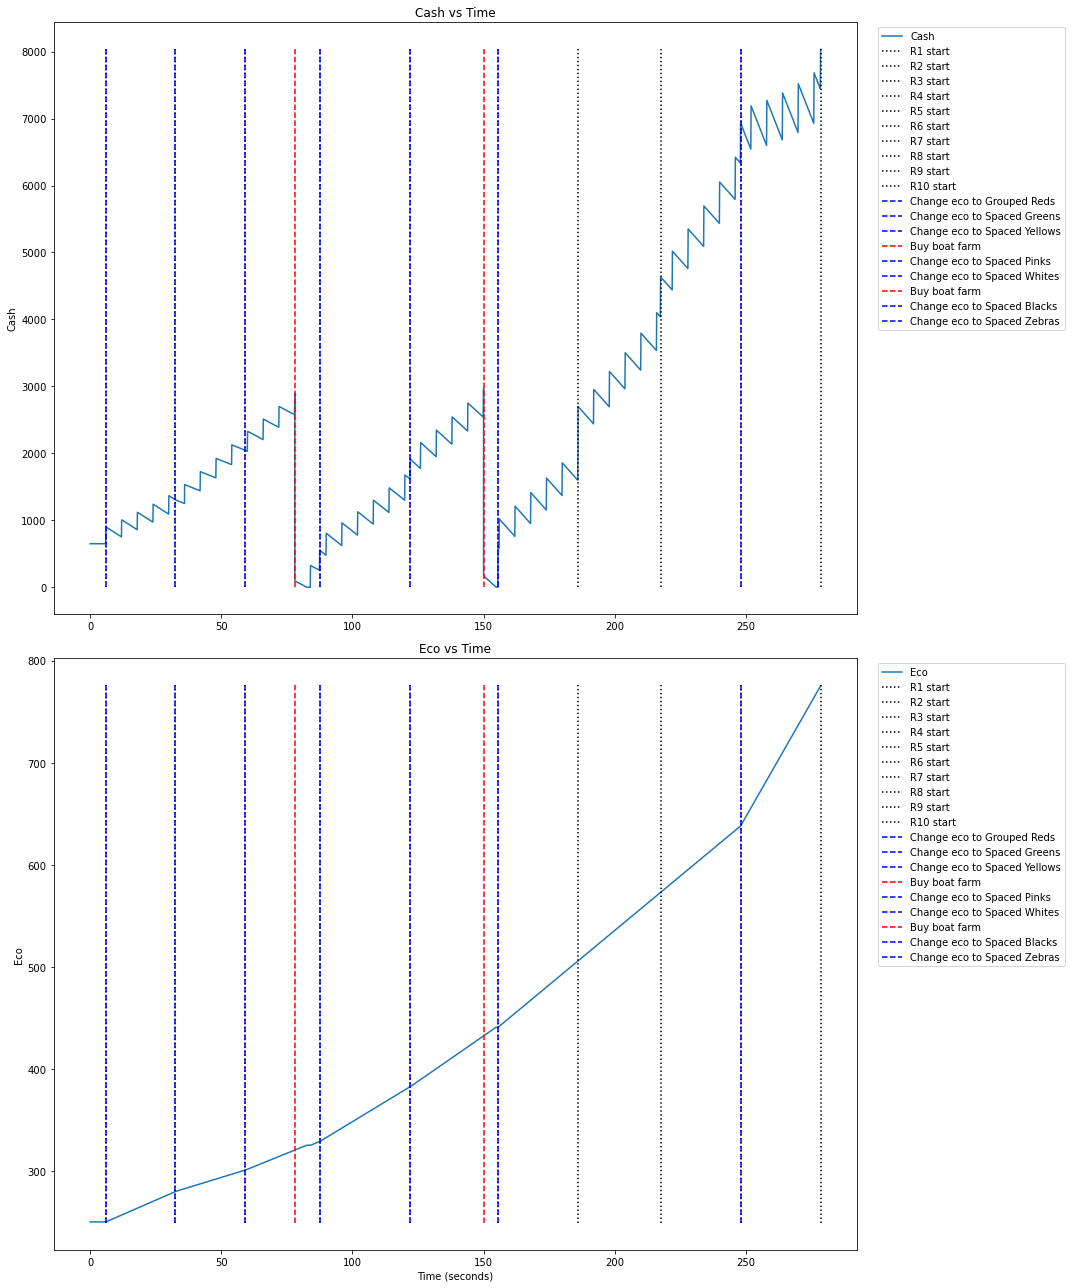

In [3]:
rounds = Rounds(1.0)

buy_queue = [
    [buyBoatFarm(min_buy_time = rounds.getTimeFromRound(1))],
    [buyBoatFarm(min_buy_time = rounds.getTimeFromRound(1))]
]
eco_queue = [
    (rounds.getTimeFromRound(1), 'Grouped Reds'), 
    (rounds.getTimeFromRound(2), 'Spaced Greens'),
    (rounds.getTimeFromRound(3), 'Spaced Yellows'), 
    (rounds.getTimeFromRound(4), 'Spaced Pinks'),
    (rounds.getTimeFromRound(5), 'Spaced Whites'),
    (rounds.getTimeFromRound(6), 'Spaced Blacks'),
    (rounds.getTimeFromRound(9), 'Spaced Zebras')
]

initial_state = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0,
    'Buy Queue': buy_queue,
    'Eco Queue': eco_queue
}
game_state = GameState(initial_state)
game_state.fastForward(target_round=10, interval=0.1)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'spoonoil')

In [4]:
writeLog(game_state.logs, filename = 'spoonoil')

## Sniper Farms in the mid-game

Our goal is to investigate optimal use of supply drops in a mid-game scenario. Most importantly, we seek to answer the following questions:
1. When should a player stop pink eco'ing when building supply drops?
2. When should a player stop building supply drops?

I'm going to assume the player has 2500 eco in a reasonably stalled game (stall factor of 0.5) and that the player has bought e-sniper midway through Round 21.

,Game State,Farm Income
0,0,0
1,1,0
2,2,0


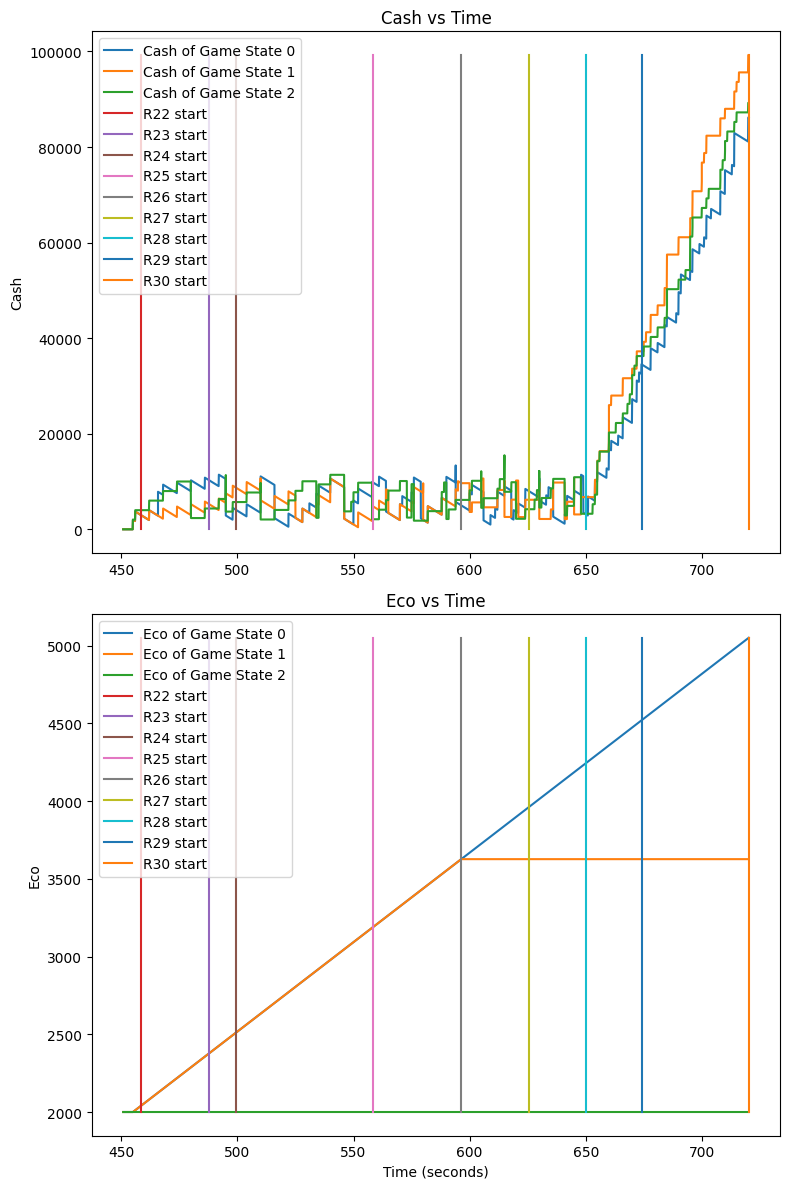

In [5]:
##############################
# DEFINING INITIAL GAME PARAMS
##############################

rounds = Rounds(0.2)

supply_drops = initSupplyDrops([rounds.getTimeFromRound(21.5)], elite_sniper = 0)
#print(supply_drops)

buy_queues = []
eco_queues = []

for i in range(3):
    if i == 0:
        eco_queues.append([])
        buy_queues.append([[repeatedlyBuySupplyDrops(min_buy_time = 0, max_buy_time = rounds.getTimeFromRound(28), buffer = 1800)]])
    elif i == 1:
        eco_queues.append([(rounds.getTimeFromRound(26),'Zero')])
        buy_queues.append([[repeatedlyBuySupplyDrops(min_buy_time = 0, max_buy_time = rounds.getTimeFromRound(28), buffer = 1800)]])
    elif i == 2:
        eco_queues.append([(rounds.getTimeFromRound(21.5),'Zero')])
        buy_queues.append([[repeatedlyBuySupplyDrops(min_buy_time = 0, max_buy_time = rounds.getTimeFromRound(28), buffer = 1800)]])
    

initial_state = {
    'Cash': 0,
    'Eco': 2000,
    'Eco Send': 'Grouped Pinks',
    'Rounds': rounds,
    'Game Round': 21.5,
    'Supply Drops': supply_drops
}

compareStrategies(initial_state, eco_queues, buy_queues, target_round = 30)

## The R22 IMF All-Out

In some cases, players may decide to abort their usual farming flowchart in favor of building an IMF Loan and all-outing on R22. We assume the player *just* before the start of round 20 has access to 1300 eco and a 420 BRF and simulate this flowchart as follows:

Round | Action to Take
---|---
21 | Purchase 240 farm
22 | Sell BRF
23 | Withdraw money from IMF
23 | Activate IMF Loan
23 | Sell IMF

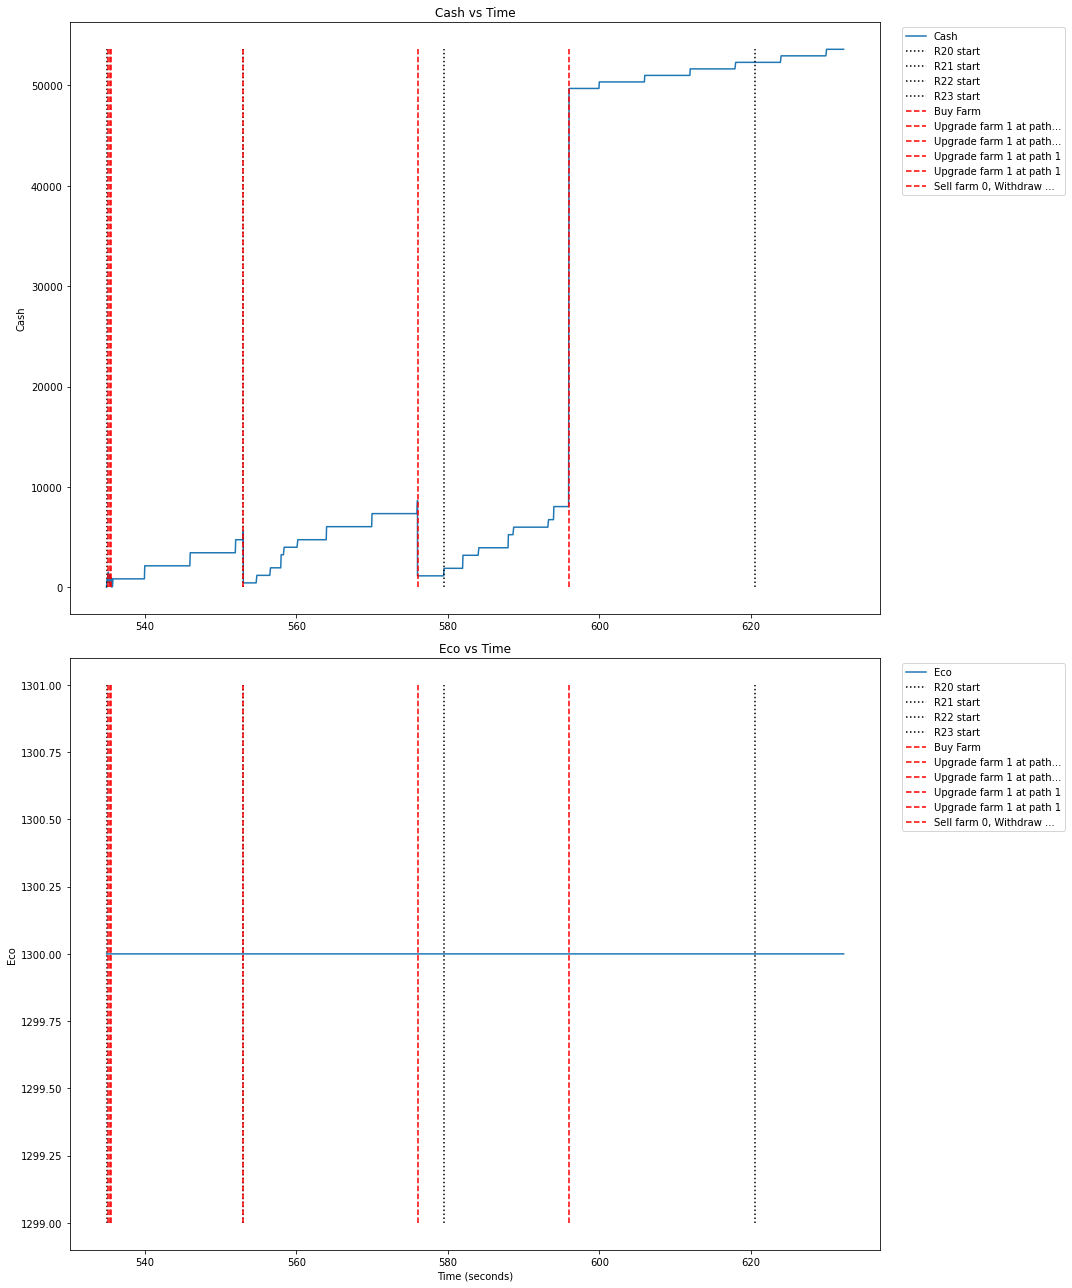

In [4]:
##############################
# DEFINING INITIAL GAME PARAMS
##############################

rounds = Rounds(0.5)

farms = {
    0: initFarm(0, upgrades = [4,2,0])
}

buy_queue = [
    #Buy a 240 Farm
    [buyFarm()],
    [upgradeFarm(1,0)],
    [upgradeFarm(1,0)],
    [upgradeFarm(1,1)],
    [upgradeFarm(1,1)],
    [upgradeFarm(1,1)],
    [upgradeFarm(1,1)],
    
    #Wait until the start of R22, then...
    #Sell the BRF, cash out the money in the Monkey Bank, Activate IMF Loan, and then sell the IMF Bank
    [sellFarm(0, min_buy_time = rounds.getTimeFromRound(22)), withdrawBank(1), activateIMF(1), sellFarm(1)]
]

initial_state_game = {
    'Cash': 0,
    'Eco': 1300,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 19.999,
    'Buy Queue': buy_queue,
    'Farms': farms
}
game_state = GameState(initial_state_game)

game_state.fastForward(target_round = 23.5, interval=0.1)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'imf_flowchart')

## MWS Into Banana Central: Compound Purchases

We demonstrate a typical build into a R27 Banana Central starting from Round 24. We assume we are halfway through the round in a half-stalled game in possession of 2 x 204 farms + 1 x 420 farm. The flowchart for Banana Central proceeds as follows

Round | Action to Take
---|---
24 | (EOR) Sell 1 x 420 + 1 x 204 farm into 205 farm
~25 | Build 1 x 420 farm
~26 | Build 1 x 420 farm
~27 | Sell 205 farm into 520 farm

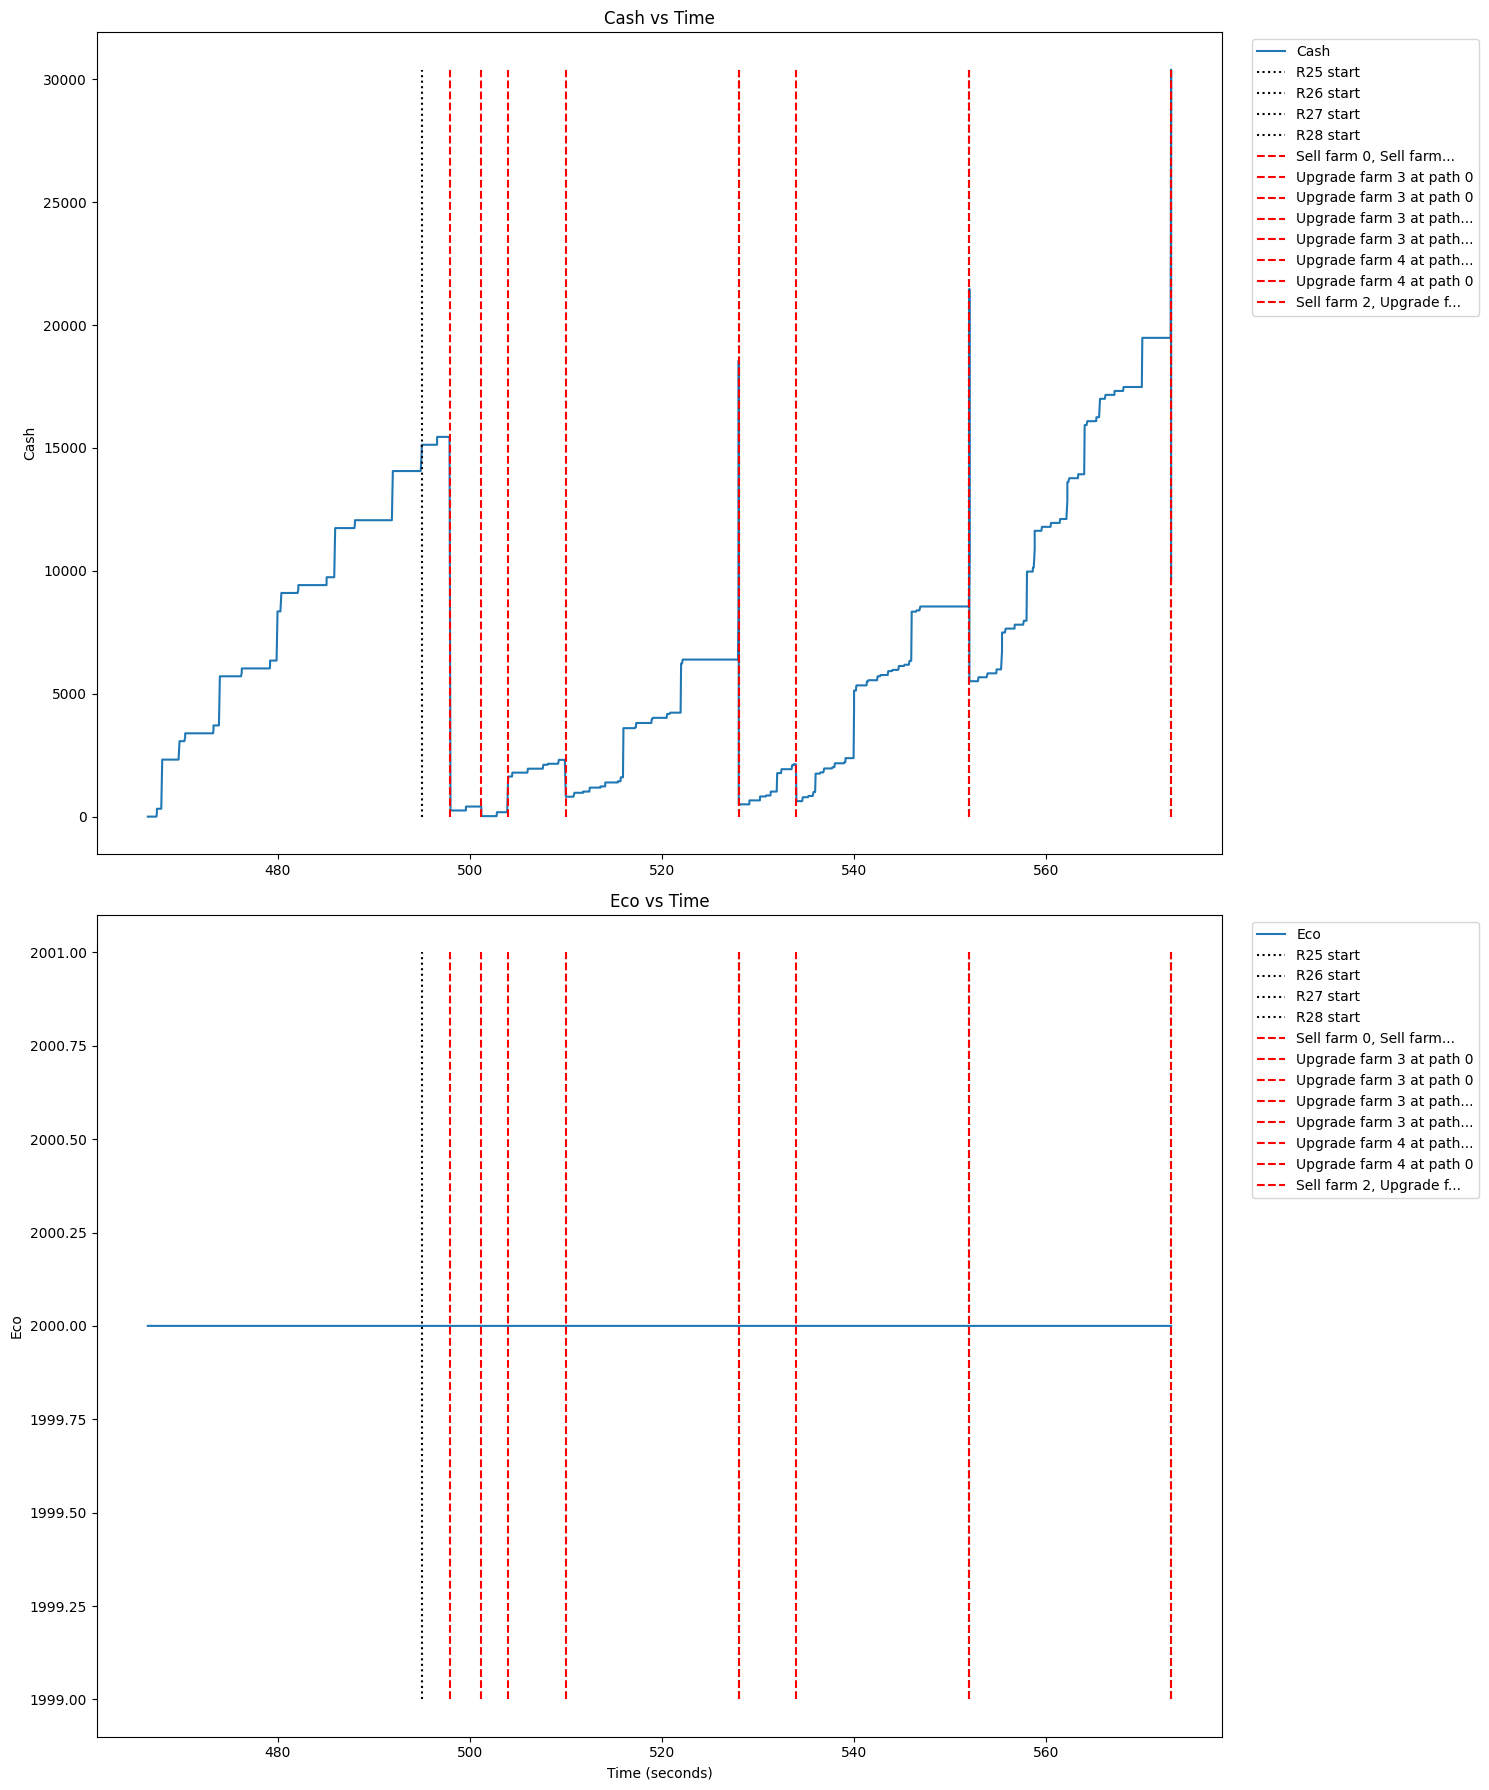

In [7]:
##############################
# DEFINING INITIAL GAME PARAMS
##############################

rounds = Rounds(0.0)

farms = {
    0: initFarm(0, upgrades = [4,2,0]), 
    1: initFarm(0, upgrades = [2,0,4]),
    2: initFarm(rounds.getTimeFromRound(19.999), upgrades = [2,0,4])
}

buy_queue = [
    
    #Sell into MWS
    [sellFarm(0), sellFarm(1), upgradeFarm(2,2)], 
    
    #Buy a 420 Farm
    [buyFarm()],
    [upgradeFarm(3,0)],
    [upgradeFarm(3,0)],
    [upgradeFarm(3,0)],
    [upgradeFarm(3,1)],
    [upgradeFarm(3,1)],
    [upgradeFarm(3,0)],
    
    #Buy another 420 Farm
    [buyFarm()],
    [upgradeFarm(4,0)],
    [upgradeFarm(4,0)],
    [upgradeFarm(4,0)],
    [upgradeFarm(4,1)],
    [upgradeFarm(4,1)],
    [upgradeFarm(4,0)],
    
    #Sell into BC
    [sellFarm(2),upgradeFarm(3,0)]
]

initial_state_game = {
    'Cash': 0,
    'Eco': 2000,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 24.5,
    'Farms': farms,
    'Buy Queue': buy_queue
}
game_state = GameState(initial_state_game)
game_state.fastForward(target_round = 28, interval = 0.1)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'bc_flowchart')


## Tack Wiz Farm R1 - R8: Quincy vs Ezili

In order for the eco/farm simulator to produce feasible results for matches, the player must account for defense-related expenses as the game progresses. To show how the code can accodomate for these sorts of scenarios, we consider a typical quincy tack wiz farm game in an anti-stalled environment, where the player attempts to purchase one 320 farm prior to the end of R8. The flow chart for defense looks generally like this:

Round | Action to Take
---|---
1 | Buy Quincy
1 | Buy 020 Tack
2 | Upgrade 020 Tack -> 120 Tack
3 | Upgrade 120 Tack -> 220 Tack
5 | Upgrade 220 -> 230 Tack
7 | Buy 011 Wiz
9 | Upgrade 011 Wiz -> 021 Wiz

,Game State,Farm Income
0,0,640
1,1,640


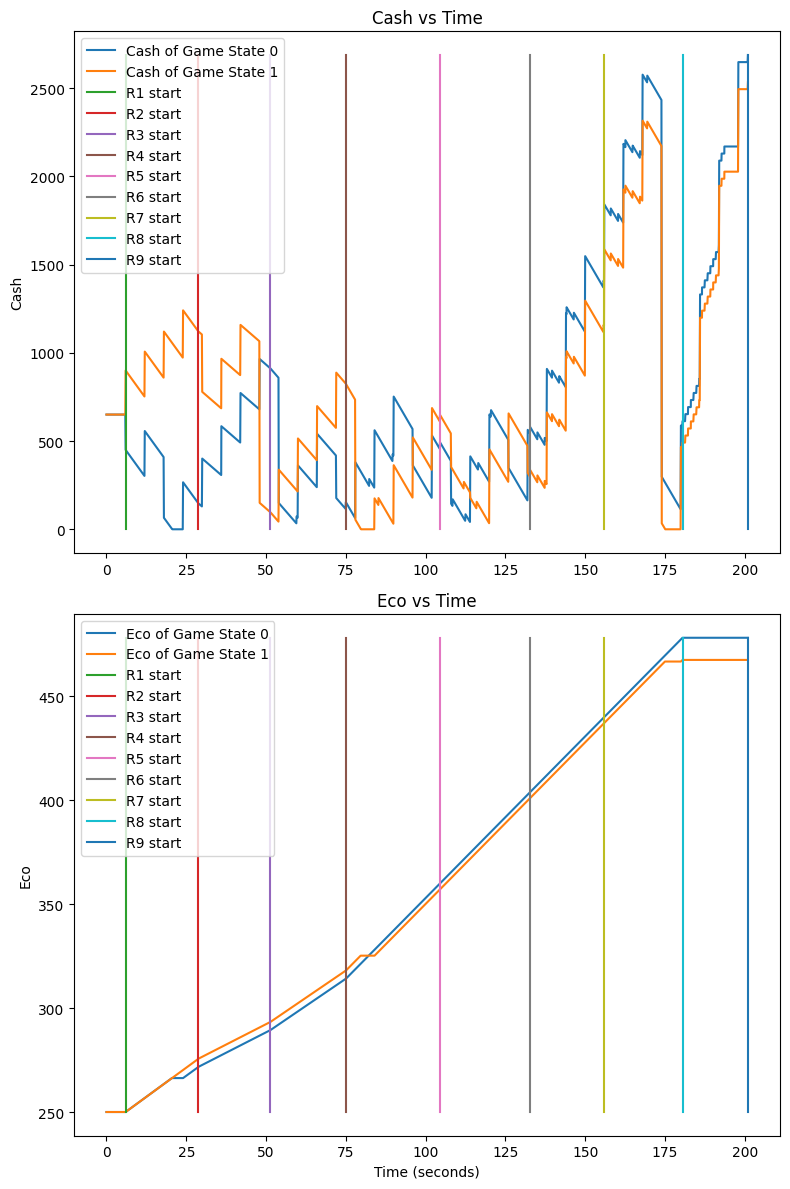

In [8]:
######################
# QUINCY TFW FLOWCHART
######################

rounds = Rounds(0.25)

buy_queue_quincy = [
    [buyDefense(450, min_buy_time = rounds.getTimeFromRound(1))], #Buy Quincy 
    [buyDefense(605)], #Buy 020 Tack
    [buyFarm()], #Buy the farm 
    [buyDefense(550)], #Upgrade to a 220 Tack 
    [upgradeFarm(0, 0, buffer = 250)], #Upgrade the farm to 100
    [buyDefense(605)], #Upgrade to 230 Tack 
    [upgradeFarm(0, 0, buffer = 250)], #Upgrade to 200 farm
    [upgradeFarm(0, 0, buffer = 0)] #Upgrade to 300 farm
]

eco_queue_quincy = [
    (rounds.getTimeFromRound(1), 'Grouped Reds'),
    (rounds.getTimeFromRound(2), 'Spaced Greens',),
    (rounds.getTimeFromRound(3), 'Spaced Yellows'),
    (rounds.getTimeFromRound(4), 'Spaced Pinks',),
    (rounds.getTimeFromRound(8), 'Zero',)
]

######################
# EZILI TFW FLOWCHART
######################

buy_queue_ezili = [
    [buyDefense(600, min_buy_time = rounds.getTimeFromRound(1.9))], #Buy Ezili 
    [buyDefense(1205)], #Buy 030 Tack
    [buyFarm()], #Buy the farm 
    [buyDefense(150)], #Upgrade to a 130 Tack 
    [upgradeFarm(0, 0, buffer = 250)], #Upgrade the farm to 100
    [buyDefense(400)], #Upgrade to 230 Tack 
    [upgradeFarm(0, 0, buffer = 250)], #Upgrade to 200 farm
    [upgradeFarm(0, 0, buffer = 0)] #Upgrade to 300 farm
]

eco_queue_ezili = [
    (rounds.getTimeFromRound(1), 'Grouped Reds'),
    (rounds.getTimeFromRound(2), 'Spaced Greens'),
    (rounds.getTimeFromRound(3), 'Spaced Yellows'),
    (rounds.getTimeFromRound(4), 'Spaced Pinks'),
    (rounds.getTimeFromRound(8), 'Zero')
]

eco_queues, buy_queues = [eco_queue_quincy, eco_queue_ezili], [buy_queue_quincy, buy_queue_ezili]

initial_state = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0
}

compareStrategies(initial_state, eco_queues, buy_queues, target_round = 9)

## The pre-round 20 BRF

We now consider a scenario typical of farm play where the user attempts to purchase BRF prior to the start of round 20.
In this scenario, we assume that the player on R18 has achieved 1 x 320 and 1 x 203 farms, 1200 eco, and intends to sell the 203 farm so as to afford the 420 farm. We assume that the player does *not* eco during this time period.

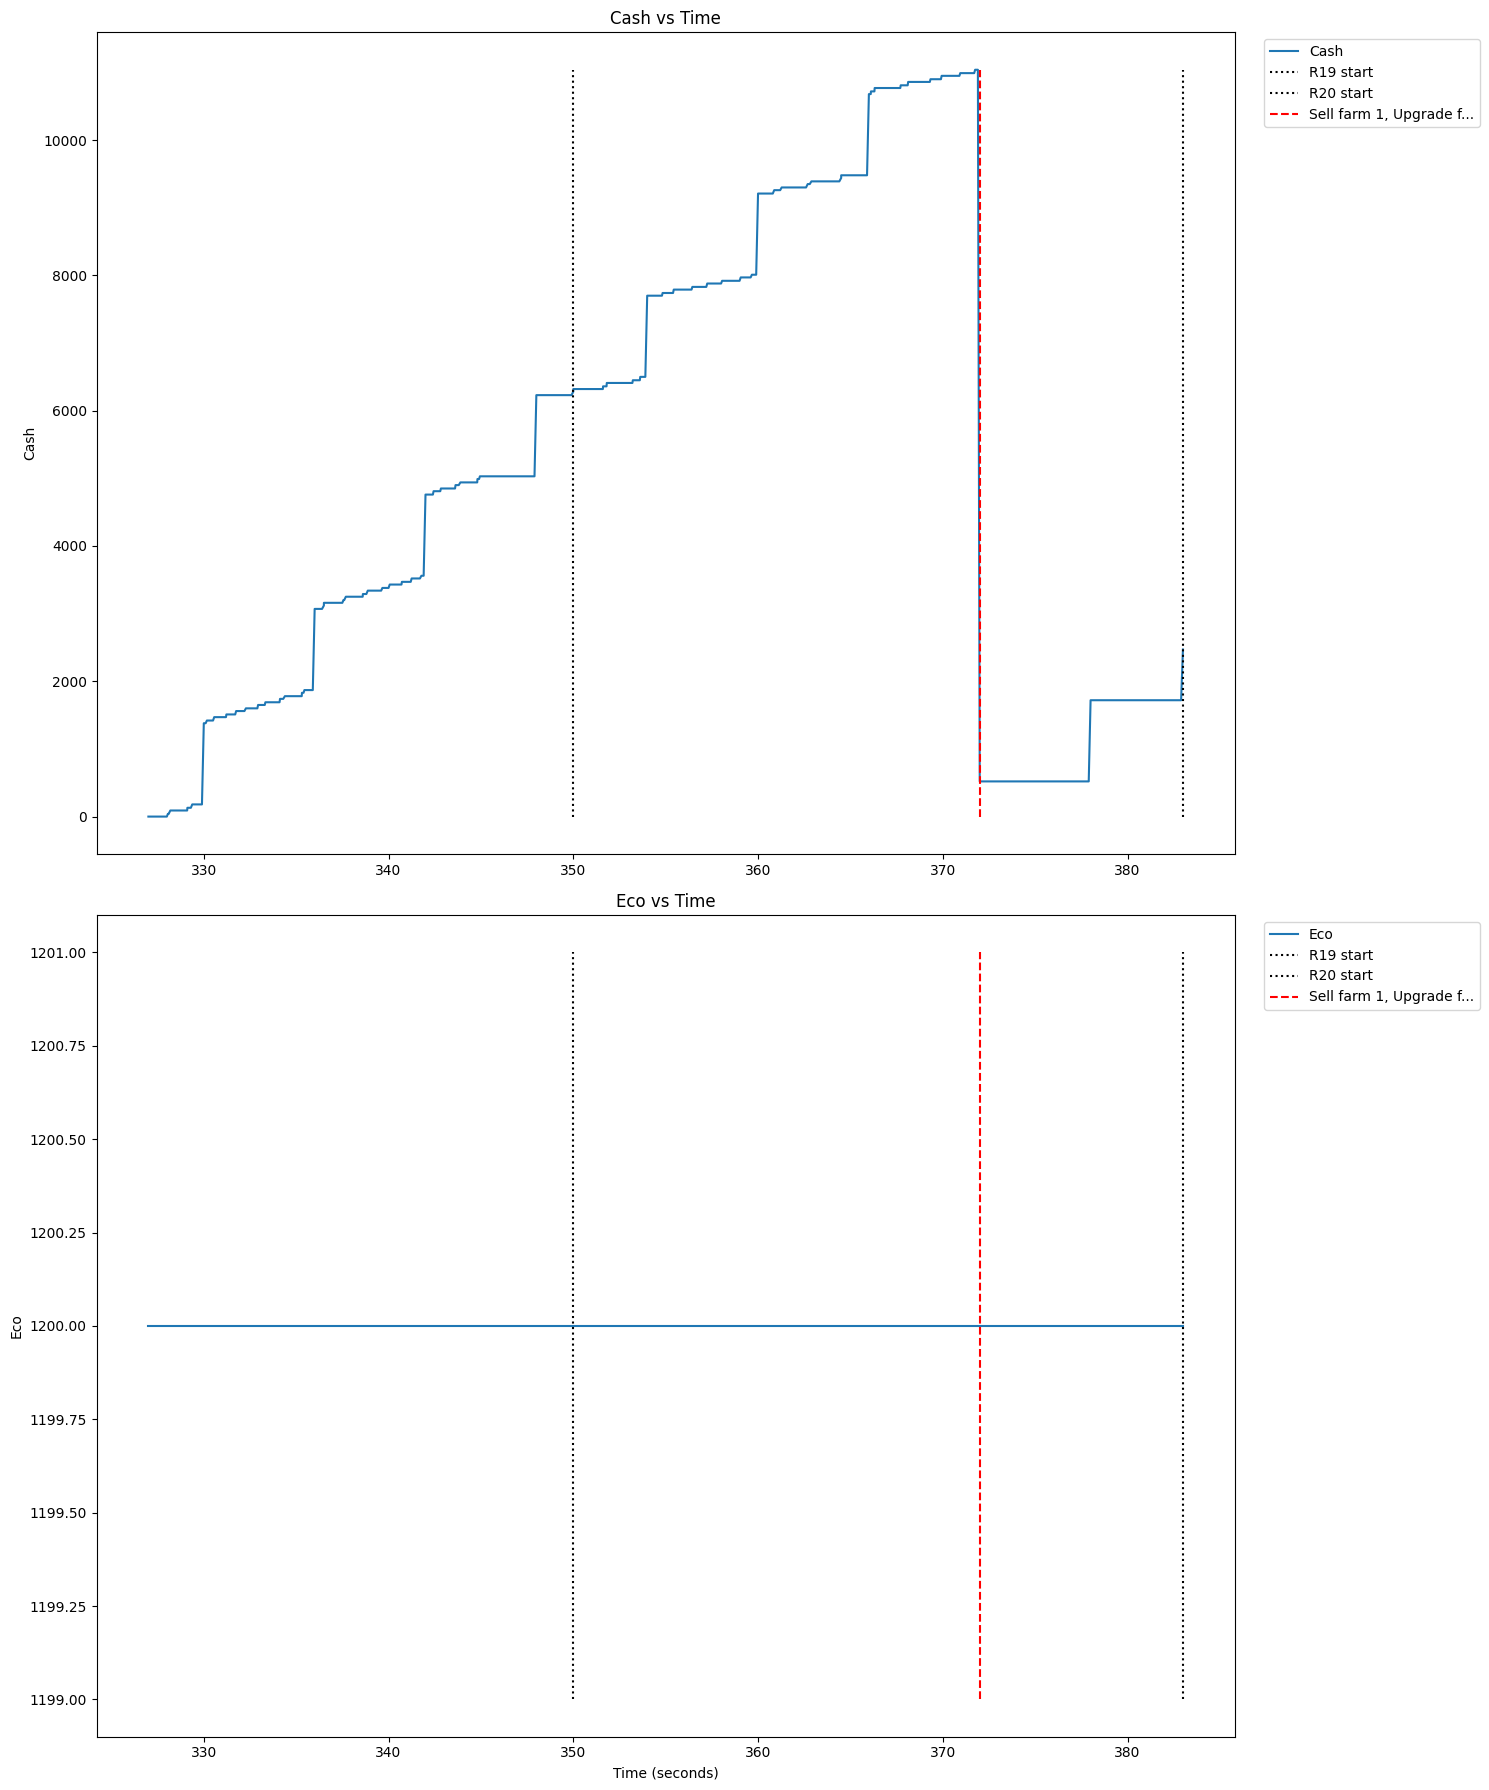

In [9]:
rounds = Rounds(0.0)

farms = {
    0: initFarm(0, upgrades = [3,2,0]), 
    1: initFarm(0, upgrades = [2,0,3])
}

buy_queue = [
    [sellFarm(1), upgradeFarm(0, 0, buffer = 0)]
]

initial_state_game = {
    'Cash': 0,
    'Eco': 1200,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 18,
    'Farms': farms,
    'Buy Queue': buy_queue
}
game_state = GameState(initial_state_game)
game_state.fastForward(target_round = 20)
game_state.viewCashEcoHistory()

## Optimizing the Pre-R20 BRF

In the above example, we see that the BRF is actually afforded with plenty of time to spare. However, in high-level play, players may see it desirable in this given mini-scenario to eco as much as possible while still being able to afford the 420 farm in time for R20.

In this extension of Case 2, we determine the longest amount of time that can be spent eco'ing grouped blacks while still being able to afford a pre-R20 BRF.

The optimal time to stop eco'ing is 479.49
That is, the player should stop eco'ing 13.99 seconds into round 19


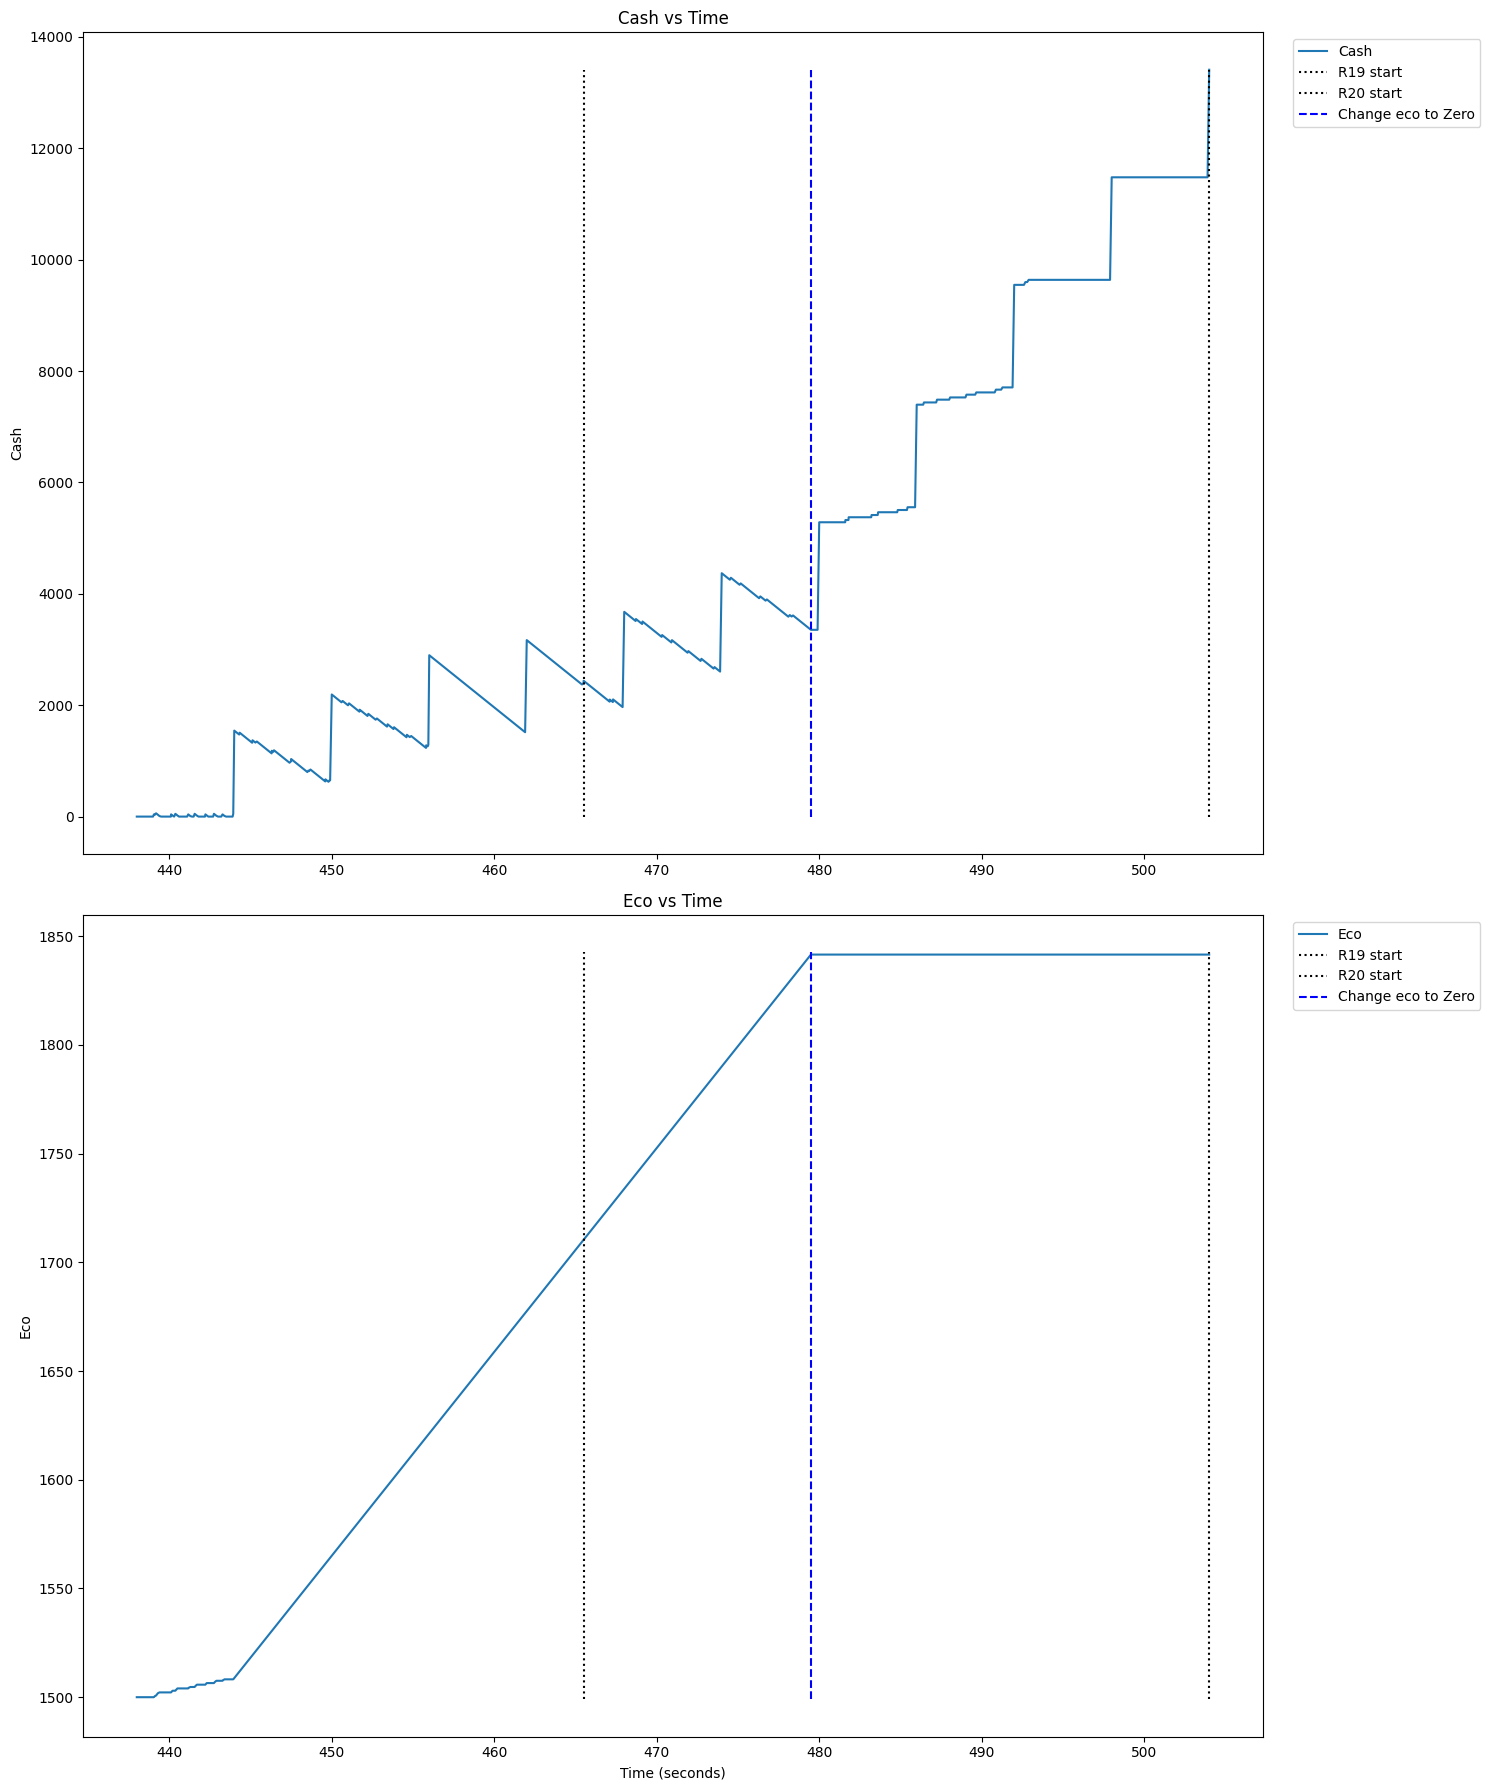

In [10]:
def foo(stop_time, game_state):
    game_state.eco_queue = [
        (stop_time,'Zero')
    ]
    game_state.fastForward(target_round = 19.999)
    
    #print("Foo returned " + str(game_state.cash - 11480))
    return game_state.cash - 11480

#Next, let's attempt to find the zero of foo using bisection method
farms = {
    0: initFarm(0, upgrades = [3,2,0]), 
    1: initFarm(0, upgrades = [2,0,3])
}

rounds = Rounds(0.5)

initial_state_game = {
    'Cash': 0,
    'Eco': 1500,
    'Eco Send': 'Grouped Blacks',
    'Rounds': rounds,
    'Game Round': 18,
    'Farms': farms,
    'Buy Queue': buy_queue
}

iterations = 20
a = rounds.getTimeFromRound(18)
b = rounds.getTimeFromRound(19.99)
for i in range(iterations):
    game_state_0 = GameState(initial_state_game)
    game_state_1 = GameState(initial_state_game)
    c = 0.5*(a+b)
    if foo(a, game_state_0)*foo(c, game_state_1) < 0:
        b = c
    else:
        a = c
        
    #print("New stop time: " + str(0.5*(a+b)))

c = 0.5*(a+b)

game_state = GameState(initial_state_game)
game_state.eco_queue = [
    (c,'Zero')
]
game_state.fastForward(target_round=20)
game_state.viewCashEcoHistory()

round_of_interest = rounds.getRoundFromTime(c)
time_into_round = c - rounds.round_starts[round_of_interest]
print("The optimal time to stop eco'ing is %s"%(np.round(c,2)))
print("That is, the player should stop eco'ing %s seconds into round %s"%(np.round(time_into_round,2),round_of_interest))

## Tigerz72's Tack Mortar Glue with Spaced Yellows

A run through of the tack mortar glue flowchart from round 1 to the start of round 8

Current Cash and Eco: (183.0,789.0)


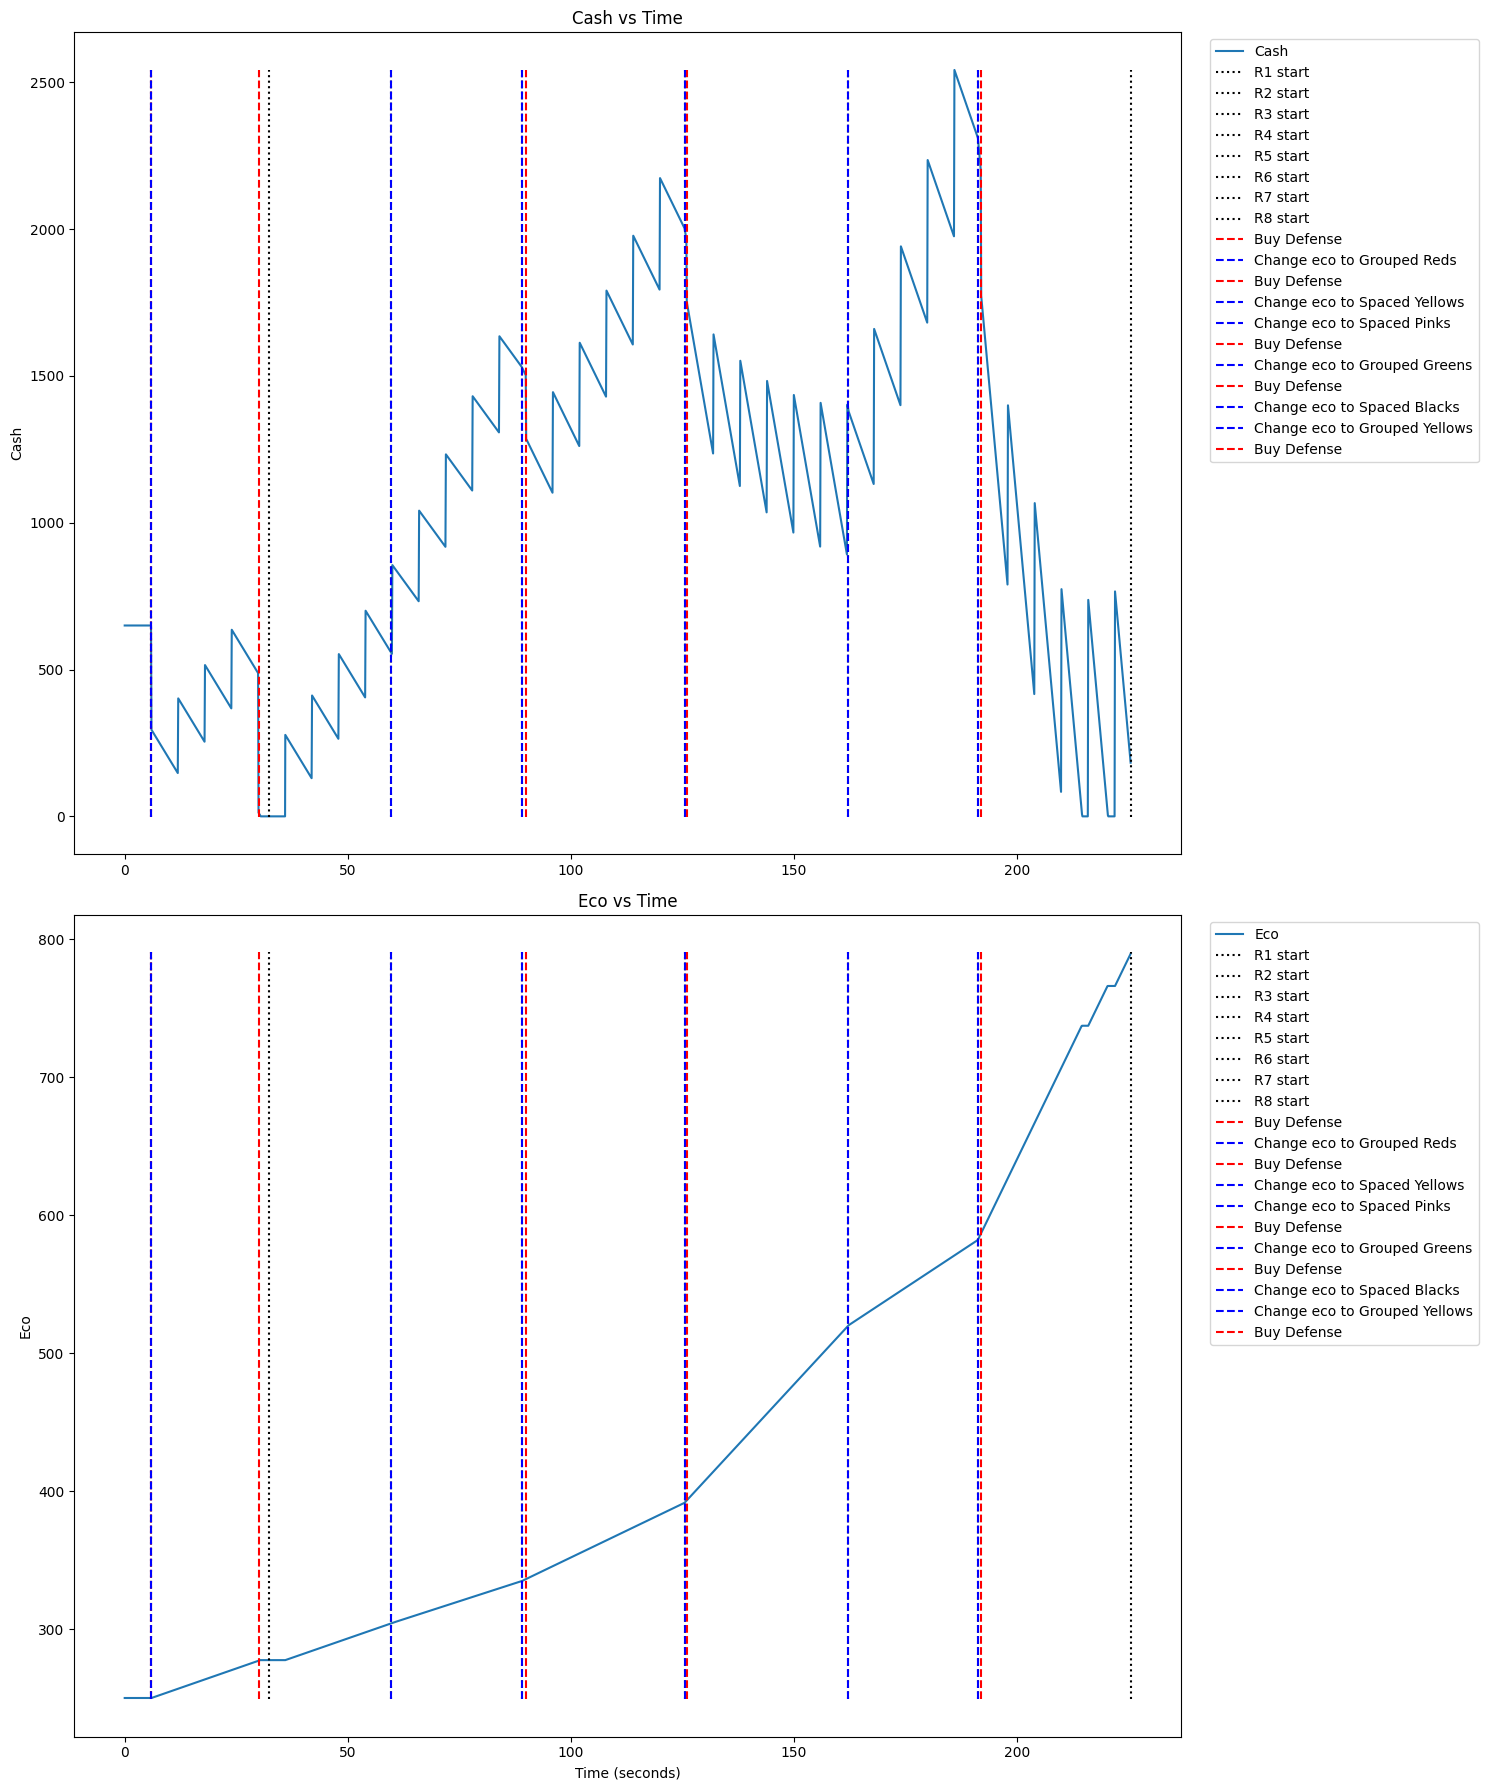

In [11]:
rounds = Rounds(0.75)

x = 0.1
eco_queue = [
    (rounds.getTimeFromRound(1-x), 'Grouped Reds'),
    (rounds.getTimeFromRound(3-x), 'Spaced Yellows'),
    (rounds.getTimeFromRound(4-x), 'Spaced Pinks'),
    (rounds.getTimeFromRound(5-x), 'Grouped Greens'),
    (rounds.getTimeFromRound(6-x), 'Spaced Blacks'),
    (rounds.getTimeFromRound(7-x), 'Grouped Yellows')
]

buy_queue = [
    [buyDefense(280+100+225, min_buy_time = rounds.getTimeFromRound(1))], #Buy 020 tack
    [buyDefense(750)], #Buy Striker Jones
    [buyDefense(550, min_buy_time = rounds.getTimeFromRound(4))], #Upgrade the tack to 220
    [buyDefense(600, min_buy_time = rounds.getTimeFromRound(5))], #Upgrade the tack to 230
    [buyDefense(1000, min_buy_time = rounds.getTimeFromRound(7))] #Buy 010 mortar
]

initial_state_game = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0,
    'Eco Queue': eco_queue,
    'Buy Queue': buy_queue
}

game_state = GameState(initial_state_game)
game_state.fastForward(target_round = 8)
game_state.viewCashEcoHistory()
writeLog(game_state.logs, filename = 'tack_mortar_glue')
print("Current Cash and Eco: (%s,%s)"%(np.round(game_state.cash,0),np.round(game_state.eco,0)))